# The Sparks Foundation - Prediction using Unsupervised ML
Task - Predict the optimum number of clusters and represent it visually.

Author - Rubal Bansal

### Import Libraries
Importing all libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The Data
Reading data in the Iris.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv("Iris.csv")
print("Data imported")

df.head()

Data imported


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Note: There are no null values and also no categorial features.

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis
We'll plot the data to see the relationships between the features.(if any)

[]

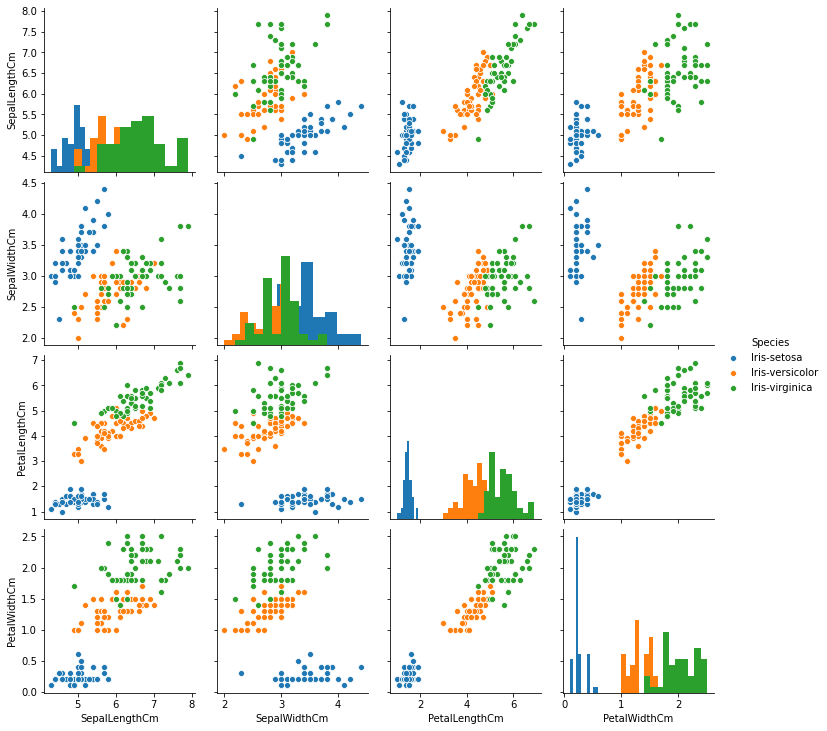

In [8]:
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.plot()

[]

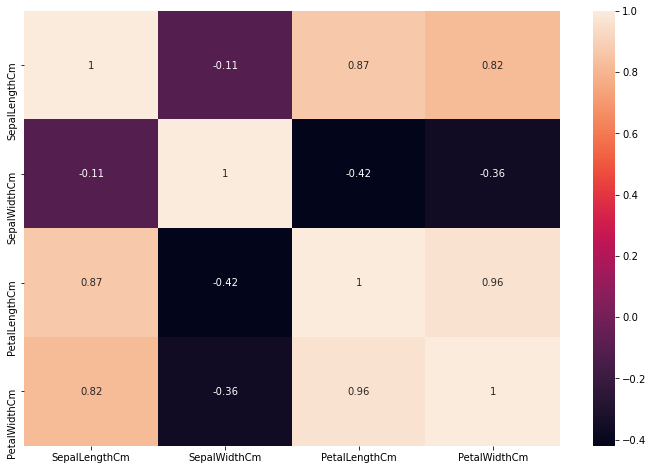

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)
plt.plot()

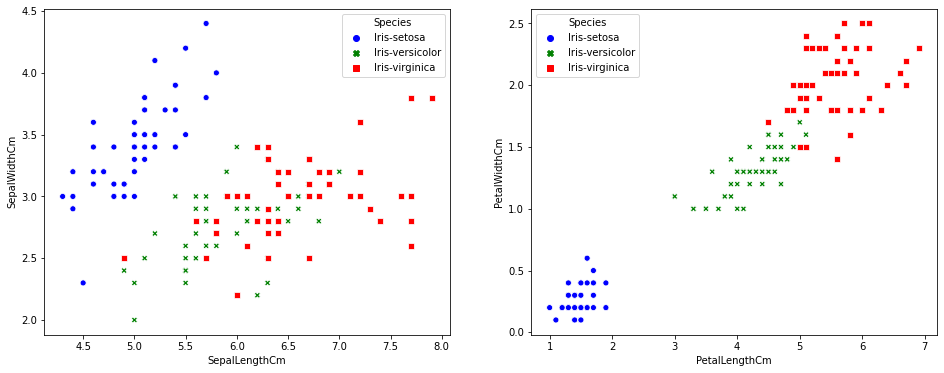

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x = df.SepalLengthCm, y =  df.SepalWidthCm,
                hue = df.Species, style = df.Species, palette=['blue', 'green', 'red']);

plt.subplot(1,2,2)
sns.scatterplot(x = df.PetalLengthCm, y =  df.PetalWidthCm,
                hue = df.Species, style = df.Species, palette=['blue', 'green', 'red']);

## Finding the number of clusters
* Using the dendogram
* Using the Elbow Method

#### Dendogram Method

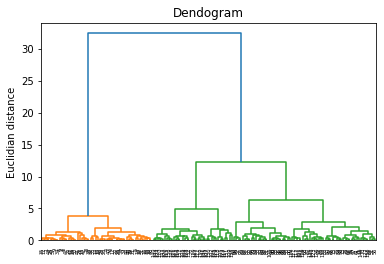

In [11]:
X = df.iloc[:, [0, 1, 2, 3]].values

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 
plt.title('Dendogram')
plt.ylabel('Euclidian distance')
plt.show()

In Dendograms, to find the number of clusters, we see the Longest Vertical distance between two horizonatal lines. Clearly here it indicates the number of Clusters should be 2, which is not true, therefore Dendograms is not a good way of finding Clusters here. So we will further move with some other Technique

#### The Elbow Method

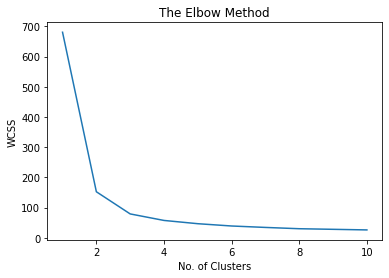

In [12]:
from  sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of Clusters = 3

## Building a K-means Clustering model
fitting k_means to the dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

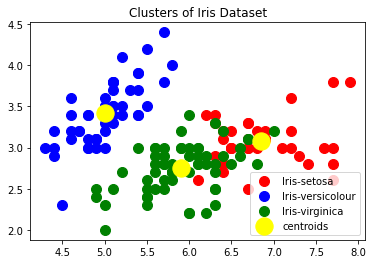

In [14]:
plt.scatter(X[y_kmeans == 0, 0],  X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0],  X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0],  X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

## Conclusion

From the above visualization we see that one species can be easily clusterd which is not the case with the other two. Which may be the reason why the Dendograms predicted 2 Clusters.

Further K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3. The above visualization is the clustered graph.

So, The total number of clusters is 3.

Compairing with the Original Iris dataset confirms that it has 3-species(3-clusters) and the main difference between them is Petals.